In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import folium
import unicodedata
import re
from IPython.display import display
import folium.plugins as plugins
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel('avec (1).xlsx', sheet_name="Base Avec")
municipios = pd.read_excel('municipiosBrasil.xls')
df.head()

,Numero do Cliente,Tipo estabelecimento,Data Apuração,Data de Entrada na Base,tamanho,Cidade,Volume Transacionado,Quantidade de Transações,Net MDR,Aluguel,Antecipação,Total,Transacionais,Antecipação.1,Equipamento/Logistica,Outros,Total.1,Margem Final
0,92,Outros,2019-03-01,2019-03-07,Pequeno,Curitiba,1200.0,12,36.00,0,18.000,54.000,-22.80,-6.000,-26,0.0,-54.800,-0.80
1,92,Outros,2019-04-01,2019-03-07,Pequeno,Curitiba,5900.0,59,120.00,0,88.500,208.500,-76.00,-29.500,0,0.0,-105.500,103.00
2,92,Outros,2019-05-01,2019-03-07,Pequeno,Curitiba,9100.0,91,183.00,0,136.500,319.500,-115.90,-45.500,0,0.0,-161.400,158.10
3,92,Outros,2019-06-01,2019-03-07,Pequeno,Curitiba,9200.0,92,219.00,0,138.000,357.000,-138.70,-46.000,0,0.0,-184.700,172.30
4,92,Outros,2019-07-01,2019-03-07,Pequeno,Curitiba,18175.0,181,371.26,0,272.625,643.885,-235.13,-90.875,0,0.0,-326.005,317.88


In [3]:
df.tail()

,Numero do Cliente,Tipo estabelecimento,Data Apuração,Data de Entrada na Base,tamanho,Cidade,Volume Transacionado,Quantidade de Transações,Net MDR,Aluguel,Antecipação,Total,Transacionais,Antecipação.1,Equipamento/Logistica,Outros,Total.1,Margem Final
6615,51921,Outros,2019-07-01,2019-03-25,Grande,São Paulo,9280.0,15,267.29,0,139.20,406.49,-203.11,-46.40,0,0.0,-249.51,156.98
6616,51921,Outros,2019-08-01,2019-03-25,Grande,São Paulo,6250.0,13,138.81,0,93.75,232.56,-105.60,-31.25,0,0.0,-136.85,95.71
6617,51921,Outros,2019-09-01,2019-03-25,Grande,São Paulo,8822.0,16,235.37,0,132.33,367.70,-179.64,-44.11,0,0.0,-223.75,143.95
6618,51921,Outros,2019-10-01,2019-03-25,Grande,São Paulo,7650.0,13,213.01,0,114.75,327.76,-162.51,-38.25,0,0.0,-200.76,127.00
6619,51921,Outros,2019-11-01,2019-03-25,Grande,São Paulo,13746.0,28,220.52,0,206.19,426.71,-168.79,-68.73,0,0.0,-237.52,189.19


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Numero do Cliente,6620.0,31562.236103,16626.001802,92.000000,21683.000000,31168.000000,46892.000000,67506.00000
Volume Transacionado,6620.0,26488.608276,49600.878779,5.000000,4651.750000,12517.050000,28530.092500,904254.00000
Quantidade de Transações,6620.0,205.026435,278.089735,1.000000,41.000000,113.000000,263.000000,3541.00000
Net MDR,6620.0,719.381305,1466.531245,0.000000,113.862500,328.295000,754.147500,36409.42000
Aluguel,6620.0,12.483082,30.465902,0.000000,0.000000,0.000000,0.000000,99.00000
Antecipação,6620.0,235.630158,594.376856,0.000000,0.000000,19.225575,246.615375,11676.41415
Total,6620.0,967.494545,1830.353136,0.000000,165.895000,452.280000,1043.535125,36409.42000
Transacionais,6620.0,-550.578302,1066.814940,-16341.250000,-580.932500,-248.460000,-85.522500,0.00000
Antecipação.1,6620.0,-71.151938,184.392952,-3892.138050,-73.591875,-5.553550,0.000000,0.00000
Equipamento/Logistica,6620.0,-3.686858,10.524239,-49.000000,0.000000,0.000000,0.000000,0.00000


In [5]:
df.tamanho.unique()

array(['Pequeno', 'Médio', 'Grande'], dtype=object)

In [6]:
df.tamanho.value_counts()

Pequeno    2606
Grande     2376
Médio      1638
Name: tamanho, dtype: int64

In [7]:
df['tamanho'].describe().T

count        6620
unique          3
top       Pequeno
freq         2606
Name: tamanho, dtype: object

In [8]:
# print('\nColunas com valor faltante:')
# print(df.isnull())

In [9]:
print(df.isnull().any())

Numero do Cliente           False
Tipo estabelecimento         True
Data Apuração               False
Data de Entrada na Base     False
tamanho                     False
Cidade                       True
Volume Transacionado        False
Quantidade de Transações    False
Net MDR                     False
Aluguel                     False
Antecipação                 False
Total                       False
Transacionais               False
Antecipação.1               False
Equipamento/Logistica       False
Outros                      False
Total.1                     False
Margem Final                False
dtype: bool


In [10]:
df.groupby('tamanho')['tamanho'].count()

tamanho
Grande     2376
Médio      1638
Pequeno    2606
Name: tamanho, dtype: int64

<AxesSubplot:xlabel='tamanho'>

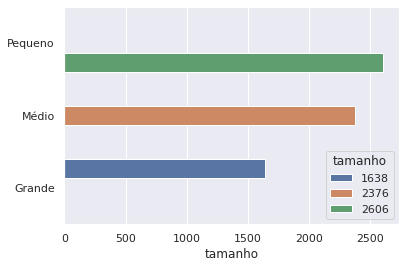

In [11]:
sns.set(style="darkgrid")
cont = df[u'tamanho'].unique()
sexo = df[u'tamanho'].value_counts()
sns.barplot(x=sexo,y=cont,hue=sexo)

## Código para gerar o Mapa

In [12]:
# Fonte: https://minerandodados.com.br/analise-exploratoria-de-dados-passo-a-passo-com-python/
def remover_acentos(txt):
    if type(txt) == str:
        nfkd = unicodedata.normalize('NFKD', txt)
        palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

        # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
        palavraSemAcento = re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)
        palavraSemAcento = str(palavraSemAcento).upper()
        return palavraSemAcento
df['Cidade'] = df['Cidade'].apply(remover_acentos)
grande = df.loc[df["tamanho"] == "Grande"]
pequeno = df.loc[df["tamanho"] == "Pequeno"]
medio = df.loc[df["tamanho"] == "Médio"]

In [33]:
def show_map(database):
    mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=3.7,tiles='Stamen Toner')
    coordenadas=[]
    for cid in database.Cidade[:20000]:
        cidadeUf = cid
        lat = municipios[municipios['MUNICIPIO'] == cidadeUf]['LATITUDE'].values
        long = municipios[municipios['MUNICIPIO'] == cidadeUf]['LONGITUDE'].values

        if len(lat) == 0:
            lat = list(lat)
            lat.append(0)
        if len(long) == 0:
            long = list(long)
            long.append(0)
        while(len(lat) != 1):
            lat = list(lat)
            lat.pop()
        while(len(long) != 1):
            long = list(long)
            long.pop()
        if lat[0] != '' and long[0] != '':
            lat = float(str(lat).replace('[','').replace(']','').replace(' ',','))
            long = float(str(long).replace('[','').replace(']','').replace(' ',','))
            coordenadas.append([lat,long])

    mapa.add_child(plugins.HeatMap(coordenadas))            
    display(mapa)
    mapa.save("mapa-consumidor.html")

### Geral

In [14]:
show_map(df)

In [15]:
lista_estabelecimentos = []
for estabelecimento in df["Tipo estabelecimento"]:
    if estabelecimento not in lista_estabelecimentos:
        lista_estabelecimentos.append(estabelecimento)

In [16]:
date_churn_outubro = "2019-10-01"
date_churn_novembro = "2019-11-01"
def calcula_tudo(data, title):
    clientes_ativos = []
    clientes = []
    clientes_outubro = []
    clientes_novembro = []
    blabla = data[["Numero do Cliente", "Data Apuração"]]
    
    total_clientes_of_this_type = 0 
    for i in blabla["Numero do Cliente"]:
        if i not in clientes:
            clientes.append(i)
            total_clientes_of_this_type += 1

    print(f"{title}: {total_clientes_of_this_type}")
    contador = 0
    fieis = 0
    clientes_fieis = []
    ativos_outubros = 0
    while contador < blabla.shape[0]-1:
        a = blabla.iloc[contador, 1]
        b = blabla.iloc[contador+1, 1]
        cliente_a = blabla.iloc[contador, 0]
        cliente_b = blabla.iloc[contador+1, 0]
        if (a == date_churn_outubro) and (b != date_churn_novembro) and (cliente_a==cliente_b):
            fieis += 1
            print("AA", cliente_a)
        if a == date_churn_outubro:
            ativos_outubros += 1
        contador += 1
        
    print("Fieis: ",fieis)
    if ativos_outubros>0:
        churn = (fieis/ativos_outubros)
    else:
        churn = 1
        print("Não tiveram ativos no mes de outubro")
    tempodevidamedio = 1/churn

    print(f"Clientes {title}")
    print(f"Churn:               {churn*100} %")
    print(f"Tempo de Vida Médio: {tempodevidamedio} meses")
    for i in lista_estabelecimentos:
        aha = data.loc[data["Tipo estabelecimento"] == i]
        media_margem = aha["Margem Final"].mean()
        receita = aha["Total"].mean()
        custo = aha["Total.1"].mean()
        transacoes = aha["Quantidade de Transações"].mean()
        print(f"{i}\n \
              Receita Média: {receita}\n \
              Custo Médio: {custo}\n \
              Margem Média: {media_margem}\n")
    clientes_maior_margem = []
    med = data[["Numero do Cliente", "Margem Final", "tamanho"]]
    count = 0
    count_clientes = 0
    reais = 0
    qtde = 0
    lista_aprovados = []
    for x in clientes:
        reais = 0
        count = 0
        cliente_apareceu = 0
        while count < med.shape[0]:
            actual = med.iloc[count, 0]
            if actual == x:
                reais += med.iloc[count, 1] 
                cliente_apareceu += 1
            count += 1
        media = reais/cliente_apareceu
        number = 0
        if title == "Pequenos":
            number = 200
        elif title == "Grandes":
            number = 1200
        elif title == "Médios":
            number = 500
        if media >= number:
            lista_aprovados.append(x)
            qtde += 1
    print(f"São {qtde} clientes")
    print(f"{qtde*100/total_clientes_of_this_type}% dos {title}")
    show_map(data)
    return lista_aprovados

### Pequenos

In [17]:
clientes_aprovados_pequenos = calcula_tudo(pequeno, "Pequenos")

Pequenos: 463
AA 2080
AA 31063
AA 50655
AA 59497
Fieis:  4
Clientes Pequenos
Churn:               1.2307692307692308 %
Tempo de Vida Médio: 81.25 meses
Outros
               Receita Média: 320.3071806722689
               Custo Médio: -216.19456415804177
               Margem Média: 104.11261651422717

Salão de Beleza
               Receita Média: 467.2191890959282
               Custo Médio: -326.769132504979
               Margem Média: 140.45005659094923

Clínica de Estética
               Receita Média: 687.9607107843138
               Custo Médio: -464.8965700961433
               Margem Média: 223.06414068817043

Barbearia
               Receita Média: 331.3125081794195
               Custo Médio: -215.20866635632638
               Margem Média: 116.10384182309318

Estúdio de Tatuagem
               Receita Média: 207.90643749999998
               Custo Médio: -147.29262171552227
               Margem Média: 60.61381578447788

Esmalteria
               Receita Média: 213.90714328

In [18]:
pequenos_ = df[["Numero do Cliente", "Data Apuração", "Margem Final"]]

meses = []
for i in range(1, 13):
    if i < 10:
        i = "0" + str(i)
    string = "2019-" + str(i) + "-01"
    meses.append(string)
    
lista_cl_f = []
lista_d_f = []
lista_m_f = []
index = 0
while index < pequenos_.shape[0]:
    if pequenos_.iloc[index, 0] in clientes_aprovados_pequenos:
        lista_cl_f.append(pequenos_.iloc[index, 0])
        lista_d_f.append(pequenos_.iloc[index, 1])
        lista_m_f.append(pequenos_.iloc[index, 2])
    index += 1

media_margem_final = numpy.mean(lista_m_f)
print(f"Média da Margem Final: {media_margem_final}")
dici = {'Numero do Cliente': lista_cl_f, "Data Apuração": lista_d_f, "Margem Final": lista_m_f}
hello = pd.DataFrame(data=dici)
hello

Média da Margem Final: 484.3056089714394


,Numero do Cliente,Data Apuração,Margem Final
0,92,2019-03-01,-0.800000
1,92,2019-04-01,103.000000
2,92,2019-05-01,158.100000
3,92,2019-06-01,172.300000
4,92,2019-07-01,317.880000
...,...,...,...
560,62395,2019-06-01,270.630000
561,62395,2019-07-01,243.018265
562,62395,2019-08-01,230.809601
563,62395,2019-09-01,200.072285


### Médios

In [19]:
clientes_aprovados_medios = calcula_tudo(medio, "Médios")

Médios: 190
AA 53347
AA 27598
AA 32328
AA 52530
AA 52601
Fieis:  5
Clientes Médios
Churn:               3.067484662576687 %
Tempo de Vida Médio: 32.6 meses
Outros
               Receita Média: 78.62615384615384
               Custo Médio: -304.7855282839884
               Margem Média: -226.15937443783457

Salão de Beleza
               Receita Média: 625.9405417188899
               Custo Médio: -423.2545847562425
               Margem Média: 202.68595696264742

Clínica de Estética
               Receita Média: 553.643262
               Custo Médio: -332.28373477288085
               Margem Média: 221.35952722711917

Barbearia
               Receita Média: 424.05371506024096
               Custo Médio: -305.528480031505
               Margem Média: 118.52523502873592

Estúdio de Tatuagem
               Receita Média: 1500.5871647058825
               Custo Médio: -830.854942626002
               Margem Média: 669.7322220798806

Esmalteria
               Receita Média: 486.705328350515

In [20]:
medio_ = df[["Numero do Cliente", "Data Apuração", "Margem Final"]]
    
lista_cl_m = []
lista_d_m = []
lista_m_m = []
index_medio = 0
while index_medio < medio_.shape[0]:
    if medio_.iloc[index_medio, 0] in clientes_aprovados_medios:
        lista_cl_m.append(medio_.iloc[index_medio, 0])
        lista_d_m.append(medio_.iloc[index_medio, 1])
        lista_m_m.append(medio_.iloc[index_medio, 2])
    index_medio += 1

media_margem_final_m = numpy.mean(lista_m_m)
print(f"Média da Margem Final: {media_margem_final_m}")
dici = {'Numero do Cliente': lista_cl_m, "Data Apuração": lista_d_m, "Margem Final": lista_m_m}
hello_medio = pd.DataFrame(data=dici)
hello_medio

Média da Margem Final: 762.7439315593422


,Numero do Cliente,Data Apuração,Margem Final
0,5835,2019-01-01,214.93860
1,5835,2019-02-01,399.89000
2,5835,2019-03-01,429.17000
3,5835,2019-04-01,386.46500
4,5835,2019-05-01,390.92534
...,...,...,...
130,52721,2019-08-01,47.00000
131,52721,2019-08-01,568.17500
132,52721,2019-09-01,592.40250
133,52721,2019-10-01,723.97700


### Grandes

In [21]:
clientes_aprovados_grandes = calcula_tudo(grande, "Grandes")

Grandes: 244
AA 34924
AA 808
AA 782
Fieis:  3
Clientes Grandes
Churn:               1.3274336283185841 %
Tempo de Vida Médio: 75.33333333333333 meses
Outros
               Receita Média: 562.7149857142857
               Custo Médio: -418.25975714285715
               Margem Média: 144.45522857142856

Salão de Beleza
               Receita Média: 1944.9403610152283
               Custo Médio: -1299.5789998984774
               Margem Média: 645.3613611167514

Clínica de Estética
               Receita Média: 555.7711181818181
               Custo Médio: -360.62710206611575
               Margem Média: 195.1440161157025

Barbearia
               Receita Média: 942.5603204697986
               Custo Médio: -552.8716687919464
               Margem Média: 389.6886516778523

Estúdio de Tatuagem
               Receita Média: nan
               Custo Médio: nan
               Margem Média: nan

Esmalteria
               Receita Média: 1351.2597416666665
               Custo Médio: -782.6852527

In [35]:
grande_ = df[["Numero do Cliente", "Data Apuração", "Margem Final", "Cidade"]]
    
lista_cl_g = []
lista_d_g = []
lista_m_g = []
lista_cidade_g = []
index_grande = 0
while index_grande < grande_.shape[0]:
    if grande_.iloc[index_grande, 0] in clientes_aprovados_grandes:
        lista_cl_g.append(grande_.iloc[index_grande, 0])
        lista_d_g.append(grande_.iloc[index_grande, 1])
        lista_m_g.append(grande_.iloc[index_grande, 2])
        lista_cidade_g.append(grande_.iloc[index_grande, 3])
    index_grande += 1

media_margem_final_g = numpy.mean(lista_m_g)
print(f"Média da Margem Final: {media_margem_final_g}")
dici = {'Numero do Cliente': lista_cl_g, "Data Apuração": lista_d_g, "Margem Final": lista_m_g, "Cidade": lista_cidade_g}
hello_grande = pd.DataFrame(data=dici)
#show_map(hello_grande)
hello_grande

Média da Margem Final: 2482.9414227739726


,Numero do Cliente,Data Apuração,Margem Final,Cidade
0,809,2019-01-01,1871.5920,SAO PAULO
1,809,2019-02-01,1675.6045,SAO PAULO
2,809,2019-03-01,1941.3740,SAO PAULO
3,809,2019-04-01,1345.6215,SAO PAULO
4,809,2019-05-01,1077.6855,SAO PAULO
...,...,...,...,...
287,39770,2019-07-01,3267.5175,SAO PAULO
288,39770,2019-08-01,2299.3650,SAO PAULO
289,39770,2019-09-01,1942.7735,SAO PAULO
290,39770,2019-10-01,2590.0855,SAO PAULO


In [41]:
grande

,Numero do Cliente,Tipo estabelecimento,Data Apuração,Data de Entrada na Base,tamanho,Cidade,Volume Transacionado,Quantidade de Transações,Net MDR,Aluguel,Antecipação,Total,Transacionais,Antecipação.1,Equipamento/Logistica,Outros,Total.1,Margem Final
4244,718,Salão de Beleza,2019-04-01,2018-06-28,Grande,SAO PAULO,57103.7,63,1644.25,0,0.00,1644.25,-1198.29,0.00,0,0.0,-1198.29,445.96
4245,718,Salão de Beleza,2019-05-01,2018-06-28,Grande,SAO PAULO,81439.2,100,2531.02,0,0.00,2531.02,-1845.63,0.00,0,0.0,-1845.63,685.39
4246,718,Salão de Beleza,2019-06-01,2018-06-28,Grande,SAO PAULO,35835.0,43,1019.96,0,0.00,1019.96,-733.33,0.00,0,0.0,-733.33,286.63
4247,718,Salão de Beleza,2019-07-01,2018-06-28,Grande,SAO PAULO,36373.0,58,1055.87,0,0.00,1055.87,-755.54,0.00,-26,0.0,-781.54,274.33
4248,718,Salão de Beleza,2019-08-01,2018-06-28,Grande,SAO PAULO,52467.0,175,1547.33,0,0.00,1547.33,-1029.28,0.00,0,0.0,-1029.28,518.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,51921,Outros,2019-07-01,2019-03-25,Grande,SAO PAULO,9280.0,15,267.29,0,139.20,406.49,-203.11,-46.40,0,0.0,-249.51,156.98
6616,51921,Outros,2019-08-01,2019-03-25,Grande,SAO PAULO,6250.0,13,138.81,0,93.75,232.56,-105.60,-31.25,0,0.0,-136.85,95.71
6617,51921,Outros,2019-09-01,2019-03-25,Grande,SAO PAULO,8822.0,16,235.37,0,132.33,367.70,-179.64,-44.11,0,0.0,-223.75,143.95
6618,51921,Outros,2019-10-01,2019-03-25,Grande,SAO PAULO,7650.0,13,213.01,0,114.75,327.76,-162.51,-38.25,0,0.0,-200.76,127.00


In [87]:
volume_transacionado = []
a = grande[["Data Apuração","Net MDR", "Antecipação", "Antecipação.1"]]
soma = 0
for mes in meses:
    ind = 0
    soma = 0
    while ind < a.shape[0]:
        if a.iloc[ind,0] == mes:
            soma += a.iloc[ind, 1] + a.iloc[ind, 2] + a.iloc[ind, 3]
        ind += 1
    volume_transacionado.append(soma)
    
i = 0
for e in volume_transacionado:
    volume_transacionado[i] = e
    i += 1
    
print(volume_transacionado)
dezembro_vendas = 1.03 * volume_transacionado[10]
janeiro_vendas = 1.03 * dezembro
fevereiro_vendas = 1.03 * janeiro
print()
print("Dezembro: " + str(dezembro_vendas))
print("Janeiro: " + str(janeiro_vendas))
print("Fevereiro: " + str(fevereiro_vendas))

[238086.9756000001, 281740.10245, 333514.4741500001, 355335.32174999965, 392546.66454999987, 372998.7007999999, 371081.8125, 423649.58509999956, 361057.5109000004, 391959.9967499997, 348383.05114999996, 0]

Dezembro: 358834.5426845
Janeiro: 376776.26981872495
Fevereiro: 395615.08330966125


In [88]:
volume_transacionado = []
a = pequeno[["Data Apuração","Net MDR", "Antecipação", "Antecipação.1"]]
soma = 0
for mes in meses:
    ind = 0
    soma = 0
    while ind < a.shape[0]:
        if a.iloc[ind,0] == mes:
            soma += a.iloc[ind, 1] + a.iloc[ind, 2] + a.iloc[ind, 3]
        ind += 1
    volume_transacionado.append(soma)
    
i = 0
for e in volume_transacionado:
    volume_transacionado[i] = e
    i += 1
    
print(volume_transacionado)
dezembro_vendas = 1.03 * volume_transacionado[10]
janeiro_vendas = 1.03 * dezembro
fevereiro_vendas = 1.03 * janeiro
    

[42054.37515000002, 56900.305149999986, 71198.66529999995, 82655.6063, 99343.51264999999, 92385.27849999996, 106138.67894999997, 127236.53835000002, 119863.26600000003, 145724.14815000005, 147923.79689999996, 0]


In [89]:
volume_transacionado = []
a = medio[["Data Apuração","Net MDR", "Antecipação", "Antecipação.1"]]
soma = 0
for mes in meses:
    ind = 0
    soma = 0
    while ind < a.shape[0]:
        if a.iloc[ind,0] == mes:
            soma += a.iloc[ind, 1] + a.iloc[ind, 2] + a.iloc[ind, 3]
        ind += 1
    volume_transacionado.append(soma)
    
i = 0
for e in volume_transacionado:
    volume_transacionado[i] = e
    i += 1
    
print(volume_transacionado)
dezembro_vendas = 1.03 * volume_transacionado[10]
janeiro_vendas = 1.03 * dezembro
fevereiro_vendas = 1.03 * janeiro
    

[35345.967599999996, 50569.97344999999, 65270.17854999999, 64576.535800000034, 82968.95064999998, 86398.36465000005, 92483.23739999997, 107631.28710000006, 98169.24945000002, 105223.83315000003, 100734.11330000003, 0]


In [ ]:
147923,79689999996

### Correlação entre os dados

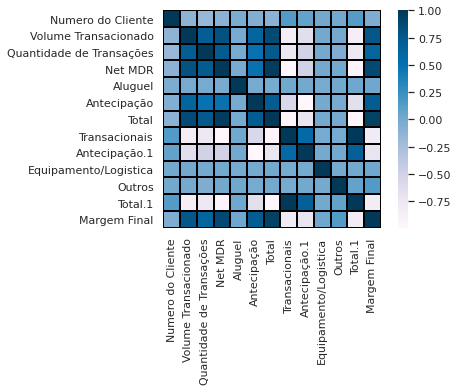

In [27]:
corr = df.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
linewidths=0.25, vmax=1.0, square=True, cmap = 'PuBu', linecolor='black', annot=False)

### Custos de Aquisição

In [24]:
for i in lista_estabelecimentos:
    data = pequeno.loc[pequeno["Tipo estabelecimento"] == i]
    media_margem = data["Margem Final"].mean()
    receita = data["Total"].mean()
    custo = data["Total.1"].mean()
    print(f"{i}\n receita: {receita}\n custo: {custo}\n p_margem: {media_margem}\n")

Outros
 receita: 320.3071806722689
 custo: -216.19456415804177
 p_margem: 104.11261651422717

Salão de Beleza
 receita: 467.2191890959282
 custo: -326.769132504979
 p_margem: 140.45005659094923

Clínica de Estética
 receita: 687.9607107843138
 custo: -464.8965700961433
 p_margem: 223.06414068817043

Barbearia
 receita: 331.3125081794195
 custo: -215.20866635632638
 p_margem: 116.10384182309318

Estúdio de Tatuagem
 receita: 207.90643749999998
 custo: -147.29262171552227
 p_margem: 60.61381578447788

Esmalteria
 receita: 213.9071432835821
 custo: -143.92821372144996
 p_margem: 69.97892956213211

nan
 receita: nan
 custo: nan
 p_margem: nan

Profissional Autônomo
 receita: 1121.5040416666668
 custo: -695.5560901233271
 p_margem: 425.9479515433397

Salão Infantil
 receita: 74.125
 custo: -28.735
 p_margem: 45.39

SPA
 receita: 71.57900000000001
 custo: -61.07215646857797
 p_margem: 10.506843531422051



### Comparação margens, receitas e custos

In [25]:
cros_norm[c].plot(kind='bar', color=('black', 'b'))

NameError: name 'cros_norm' is not defined

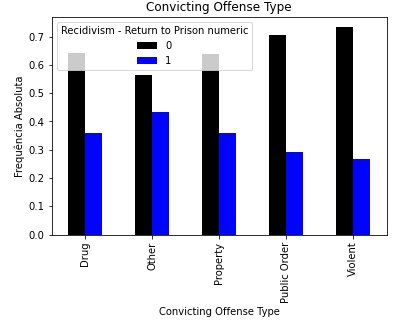

### Soma de custos e receita em pizza para cada área

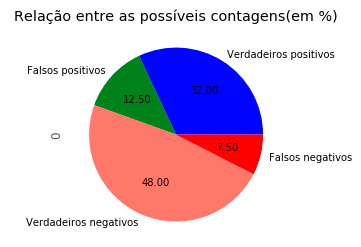

In [ ]:
grafico_pizza2 = pd.DataFrame({'Verdadeiros positivos': [list_porc[0]], 'Falsos positivos': [list_porc[2]], 'Verdadeiros negativos': [list_porc[1]], 'Falsos negativos': [list_porc[3]]}).transpose()
grafico_pizza2.plot(kind='pie', colors=('blue', 'green', 'salmon', 'red'), autopct="%0.2f",legend=False, subplots=True)
plt.title('Relação entre as possíveis contagens(em %)')

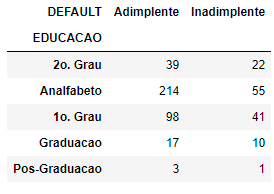

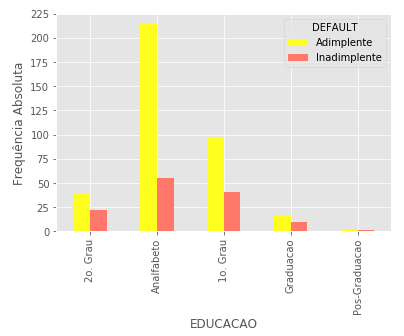

In [ ]:
ct1.plot(kind='bar', color=('yellow', 'salmon'))
plt.ylabel('Frequência Absoluta')

### Calculo de correlações

In [ ]:
clientes_ativos = []
clientes = []
clientes_outubro = []
clientes_novembro = []
date_churn1 = "2019-10-01"
date_churn2 = "2019-11-01"
blabla = pequeno[["Numero do Cliente", "Data Apuração"]]

total_clientes_pequenos = 0 
for i in blabla["Numero do Cliente"]:
    if i not in clientes:
        clientes.append(i)
        total_clientes_pequenos += 1

contador = 0
fieis = 0
clientes_fieis = []
ativos_outubros = 0
while contador < blabla.shape[0]-1:
    a = blabla.iloc[contador, 1]
    b = blabla.iloc[contador+1, 1]
    if a == date_churn1 and b == date_churn2:
        fieis += 1
    if a == date_churn1:
        ativos_outubros += 1
    contador += 1

churn = (total_clientes_pequenos - fieis/ativos_outubros)

tempodevidamedio = 1/churn

print("Pequenos")
print(f"Churn {(total_clientes_pequenos - fieis)*100/ativos_outubros}")
print(f"Tempo de Vida Média {tempodevidamedio}")

In [ ]:
def exploratoria (data,compara, num=[], cat=[]):
    d0=data[data[compara]==0]
    d1=data[data[compara]==1]
    cros={}
    cros_norm={}
    box={}
    for c in cat:
        print(pd.crosstab(data[c],data[compara],normalize='index'))
        
        print(pd.crosstab(data[c],data[compara]))
        cros[c] = pd.crosstab(data[c],data[compara])
        cros_norm[c] = pd.crosstab(data[c],data[compara],normalize='index')
        cros_norm[c].plot(kind='bar', color=('black', 'b'))
        plt.ylabel('Frequência Absoluta')
        plt.show()
        print ('Não Reincide')
        d0[c].hist(density=True,xrot=90)
        plt.show()
        print ('Reincide')
        d1[c].hist(density=True,xrot=90)
        plt.show()
    for n in num:
        plt.figure()
        data.boxplot(column = [n], by = compara)
        box[c]=data.boxplot(column = [n], by = compara)
    return{'crosstab':cros,'boxplot':box,'normed': cros_norm}